In [2]:
# This Code Does an Import of a CSV file an alternative may be an excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')


#Phase 1 collecting the data
pd.set_option("expand_frame_repr", False) #Avoids Printing on the next line when you import a dataset
df= pd.read_csv('C:/Users/Marc/Dropbox/University of Pretoria/791/Cheat Sheet/FUN Datasets/Student Mental Health.csv')
df.columns =["Timestamp","Gender", "Age", "Course", "Year", "CGPA", "Status", "Depression", "Anxiety", "Panic", "Treatment"]
df

,Timestamp,Gender,Age,Course,Year,CGPA,Status,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [3]:
#Can we actually determine the type of species based on the bill length, bill depth, flipper length and body mass 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier   #estimator in GA
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Convert levels to numeric
feature_encoder= LabelEncoder()
df['Timestamp'] = feature_encoder.fit_transform(df['Timestamp'])
df['Gender'] = feature_encoder.fit_transform(df['Gender'])
df['Status'] = feature_encoder.fit_transform(df['Status'])
df['Depression'] = feature_encoder.fit_transform(df['Depression'])
df['Anxiety'] = feature_encoder.fit_transform(df['Anxiety'])
df['Panic'] = feature_encoder.fit_transform(df['Panic'])
df['Treatment'] = feature_encoder.fit_transform(df['Treatment'])

In [5]:
df.head(10)

,Timestamp,Gender,Age,Course,Year,CGPA,Status,Depression,Anxiety,Panic,Treatment
0,23,0,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,24,1,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,25,1,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,26,0,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,27,1,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0
5,28,1,19.0,Engineering,Year 2,3.50 - 4.00,0,0,0,1,0
6,29,0,23.0,Pendidikan islam,year 2,3.50 - 4.00,1,1,0,1,0
7,30,0,18.0,BCS,year 1,3.50 - 4.00,0,0,1,0,0
8,31,0,19.0,Human Resources,Year 2,2.50 - 2.99,0,0,0,0,0
9,32,1,18.0,Irkhs,year 1,3.50 - 4.00,0,0,1,1,0


Text(0.5, 0, 'GCPA')

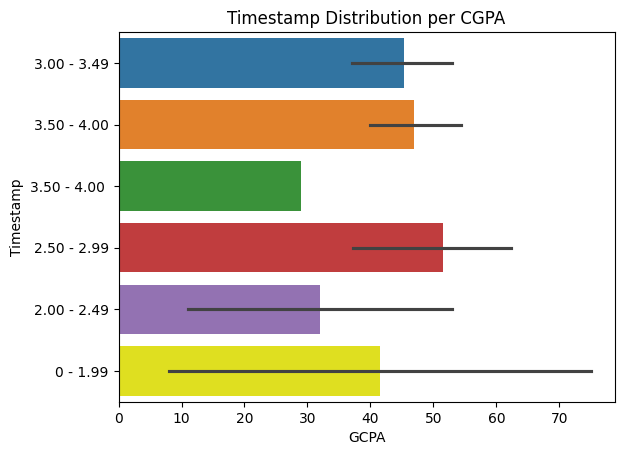

In [6]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#FFFF00"]
sns.barplot(y = "CGPA", x="Timestamp", data = df, palette=colors)
plt.title("Timestamp Distribution per CGPA")
plt.ylabel("Timestamp")
plt.xlabel("GCPA")

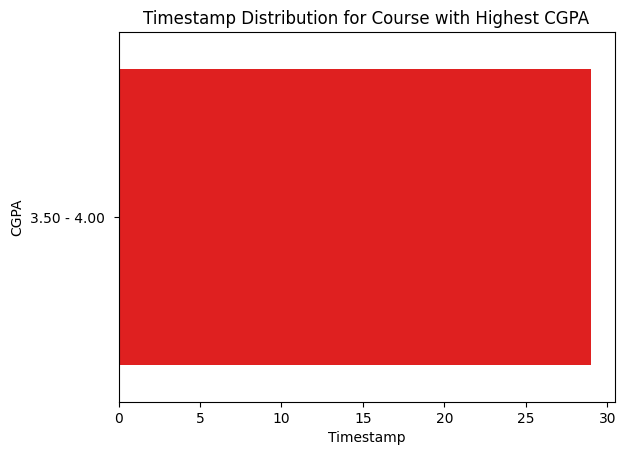

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

max_cgpa = df["CGPA"].max()

df_max_cgpa = df[df["CGPA"] == max_cgpa]

sns.barplot(y="CGPA", x="Timestamp", data=df_max_cgpa, color="red")
plt.title("Timestamp Distribution for Course with Highest CGPA")
plt.ylabel("CGPA")
plt.xlabel("Timestamp")
plt.show()

In [8]:
# Group the data by 'Course' and calculate the sum of 'Depression'
course_depression_counts = df.groupby('Course')['Depression'].sum()

# Find the course with the most depressed students
most_depressed_course = course_depression_counts.idxmax()
most_depressed_students = course_depression_counts.max()

print(f"The course with the most depressed students is '{most_depressed_course}' with {most_depressed_students} depressed students.")

The course with the most depressed students is 'Engineering' with 7 depressed students.


In [10]:
# Group the data by 'Course' and calculate the sum of 'Depression'
course_depression_counts = df.groupby('Course')['Depression'].sum()

# Find the course with the most depressed students
most_depressed_course = course_depression_counts.idxmax()

# Filter the DataFrame to include only the students in the most depressed course
most_depressed_students_df = df[df['Course'] == most_depressed_course]

# Group the filtered data by 'Gender' and calculate the sum of 'Depression'
gender_depression_counts = most_depressed_students_df.groupby('Gender')['Depression'].sum()

# Find the gender with the most depressed students
most_depressed_gender = gender_depression_counts.idxmax()

# Output the result
print(f"The most depressed gender among students in the '{most_depressed_course}' course is '{most_depressed_gender}'.")


The most depressed gender among students in the 'Engineering' course is '0'.


In [11]:
# Filter the DataFrame to include only students who want treatment (Treatment == 1)
students_wanting_treatment = df[df['Treatment'] == 1]

# Group the filtered data by 'Course' and 'Gender' and calculate the count of students wanting treatment
treatment_counts = students_wanting_treatment.groupby(['Course', 'Gender']).size().reset_index(name='Count')

# Find the course and gender with the most students wanting treatment
most_wanted_course_gender = treatment_counts[treatment_counts['Count'] == treatment_counts['Count'].max()]

most_wanted_course = most_wanted_course_gender['Course'].values[0]
most_wanted_gender = most_wanted_course_gender['Gender'].values[0]

print(f"The course and gender that need the most treatment are '{most_wanted_course}' and'{most_wanted_gender}'.")

The course and gender that need the most treatment are 'ALA' and'0'.
